In [1]:
import sys
sys.path.insert(0,'C:\\Users\\Syahrir Ridha\\PycharmProjects\\NET_Solver\\')
import numpy as np
import pandas as pd
import torch
from geometry import *
from utils import Plot_Grid
from utils import *
from solver import *
from models import *
from mesh import *
from boundary import *
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
%matplotlib inline

In [2]:
# fluid sampe XCD-PAC7 ( Annulus #2)
# D-in = 0.5 inch ; D-Out = 1.38 inch
# eccentricity  = 0
# yield stress = 0
# K = 2.92
data = pd.read_csv('data.csv')
xcd7 = data.loc[(data['test_fluid']=='XCD5')&(data['annulus']=='annulus_1')]
# convert K from Pas to lbf/100ft2 (direct substitution)
xcd7['k'] = 1.34
xcd7['shear_pa'] = 13.58

# add r_in and r_out and convert inch to feet (1 inch = 0.0833333 ft)
xcd7['r_out'] = (1.38*0.0833333)/2
xcd7['r_in'] = (0.38 * 0.0833333)/2

# convert flowrate from GPM into ft3/s (uisng 1GPM = 0.0022280093 ft3/s)
xcd7['flow_rate_gpm'] = xcd7['flow_rate_gpm'] * 0.0022280093

# convert diff pressure from Inch H20 to lbf/ft2 (using 1 inch H20 = 5.202330023139 lbf/ft2)
# convert diff pressure into pressure gradient by dividing it by test section length (18ft)
xcd7['diff_p'] = (xcd7['diff_p']*5.202330023139)/18
xcd7

,flow_rate_gpm,annulus,ecc,di/do,test_fluid,shear_pa,k,m,diff_p,r_out,r_in
321,0.042730,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,12.144550,0.0575,0.015833
322,0.040593,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,11.829520,0.0575,0.015833
323,0.038842,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,11.572294,0.0575,0.015833
324,0.036848,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,11.378652,0.0575,0.015833
325,0.034562,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,11.106975,0.0575,0.015833
326,0.031674,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,10.930673,0.0575,0.015833
327,0.029463,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,10.711019,0.0575,0.015833
328,0.027221,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,10.453793,0.0575,0.015833
329,0.024699,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,10.187896,0.0575,0.015833
330,0.021884,annulus_1,1.0,0.27,XCD5,13.58,1.34,0.48,9.948011,0.0575,0.015833


In [3]:
# # fluid sampe XCD-PAC7 ( Annulus #2)
# # D-in = 0.5 inch ; D-Out = 1.38 inch
# # eccentricity  = 0
# # yield stress = 0
# # K = 2.92
# data = pd.read_csv('data.csv')
# xcd7 = data.loc[(data['test_fluid']=='XCD-PAC3')&(data['annulus']=='annulus_4')]

# # add r_in and r_out and convert inch to feet (1 inch = 0.0833333 ft)

# xcd7['r_out'] = (0.82)/2
# xcd7['r_in'] = (0.63)/2
# xcd7['diff_p'] = (xcd7['diff_p'])/(12*18)
# xcd7

In [4]:
# non dimensionalize the inputs
# convert density from Ppg (1 lbm/gal = 7.48 lbm/ft3 using )
# density = 8.33 * 7.48 = 62.31 273 lbm/ft3
non_dim = Dimensional(xcd7['r_out'], xcd7['k'], xcd7['m'], density= 8.33 )


In [5]:
#non_dim.non_dim_press(xcd7['diff_p']).iloc[-1]

In [6]:
r_out = non_dim.non_dim_radius(xcd7['r_out']).iloc[0]
r_in = non_dim.non_dim_radius(xcd7['r_in']).iloc[0]
nx, ny = 8,8
xi_, eta_ = torch.linspace(0,1,nx,requires_grad=True), torch.linspace(0,1,ny,requires_grad=True)
xi, eta = torch.meshgrid(xi_, eta_)
xi, eta = xi.reshape(-1,1), eta.reshape(-1,1)
anulus = Analytical_Annulus(r_out, r_in, 1.0)

In [7]:
# code the governing equations using non dimensional scheme

tau = non_dim.non_dim_yield(xcd7['shear_pa']).iloc[0]
n = xcd7['m'].iloc[0]
m = 65
M = non_dim.non_dim_constrain(m).iloc[0]
dpdz = non_dim.non_dim_press(xcd7['diff_p']).iloc[-4]

class Gov_Eq(PDE):
    
    def PDELoss(self, inputs, outputs):
        
        # seperate the inputs
        xi, eta = inputs[:,0], inputs[:,1]
        
        # calculate the x and y coordinates
        grid = TFI(xi, eta, anulus)
        x, y = grid.X(), grid.Y()
        
        # calculate all the gradients
        dxdxi, dxdeta, dydxi, dydeta, jac = self.cal_grads(x, y, xi, eta)
        print(dxdxi)
        
        # calculate alpha, beta and gamma
        alpha = dxdeta**2 + dydeta**2
        gamma = dxdeta*dxdxi + dydeta*dydxi
        beta = dxdxi**2 + dydxi**2
        
        # output gradients
        out_grad = self.compute_grad(outputs, inputs)
        dudxi, dudeta = out_grad[:,0], out_grad[:,1]
        
        # compute the apparent viscosity
        _ua = self.mod_vis(out_grad, x, y, xi, eta, n, tau, M)
        #print(_ua)
        
        # code part (a)
        left = (_ua/jac)*(alpha*dudxi - gamma*dudeta)
        
        # code part(b)
        right = (_ua/jac)*(beta*dudeta - gamma*dudxi)
        
        # derivative of left and right
        left_xi = self.compute_grad(left, inputs)[:,0]
        
        right_eta = self.compute_grad(right, inputs)[:,1]
        
        # combine evverything
        gov_eq = (1/jac)*(left_xi + right_eta) - dpdz
        
        return {'PDE': gov_eq}
    

     # define the modified apparent viscosity
    def mod_vis(self,out_grad, x,y, xi, eta, n, tau, M ):
        
        # claculate the shear rate 
        shear = self.shear_rate(out_grad, x,y, xi, eta)
        #print(shear.reshape(nx,ny))
        
        # modified viscosity function
        vis = shear**(n-1) + (tau/shear)*( 1 - torch.exp(-M*shear) )
        
        return torch.abs_(vis)
    
    #define the shear rate
    def shear_rate(self, out_grad, x,y, xi, eta, tol=1e-5):
        # calcuate the cord grads
        dxdxi, dxdeta, dydxi, dydeta, jac = self.cal_grads(x,y,xi, eta)
        
        # output grads
        dudxi = out_grad[:,0]
        dudeta = out_grad[:,1]
        
        # calculate the shear rate
        shear_ = (1/jac)*((dydeta*(dudxi) - dydxi*(dudeta))**2 + (dxdxi*(dudeta) - dxdeta*(dudxi))**2)**(0.5)
        
        # create mask
        dummy_shear = torch.zeros_like(shear_)
        mask = shear_ <= tol
        indices = torch.nonzero(mask).unsqueeze(1)
        dummy_shear[indices] = tol
        shear = (1/jac)*((dydeta*(dudxi+dummy_shear) - dydxi*(dudeta+dummy_shear))**2 + (dxdxi*(dudeta+dummy_shear) - dxdeta*(dudxi+dummy_shear))**2)**(0.5)
        #print(shear)
        return (shear)

#     def shear_rate(self, out_grad, x,y, xi, eta, tol=1e-2):
#         #calcuate the cord grads
#         dxdxi, dxdeta, dydxi, dydeta, jac = self.cal_grads(x,y,xi, eta)
        
#         # output grads
#         dudxi = out_grad[:,0]
#         dudeta = out_grad[:,1]
        
#         numerator = torch.zeros_like(dudxi)
#         one_mask = (dudxi != 0)
#         numerator[one_mask] = (1/jac[one_mask])*torch.sqrt((dydeta[one_mask]*dudxi[one_mask])**2 + (dxdxi[one_mask]*dudeta[one_mask])**2)
#         y = (numerator)
#         zero_mask = (dudxi ==0)
#         y[zero_mask] = 0
#         #print(y)
        
#         return (y)
        
    
    def cal_grads(self, x, y, xi, eta):
        # compute all the gradients wrt x,y 
        dxdxi = self.compute_grad(x, xi)
        dxdeta = self.compute_grad(x, eta)
        dydxi = self.compute_grad(y, xi)
        dydeta = self.compute_grad(y, eta)
        jac = dxdxi*dydeta - dxdeta*dydxi
        
        return dxdxi, dxdeta, dydxi, dydeta, jac
    
# initiate the PDE equation
pde = Gov_Eq(inputs=('xi', 'eta'), outputs='u')

pass


In [8]:
# define the meshing data
xi_m, eta_m = np.linspace(0,1,nx), np.linspace(0,1,ny)
mesh = Mesh({'xi':xi_m, 'eta':eta_m})
pde.set_mesh(mesh)

In [9]:
# # when u = 0 @ xi = 0,1
# xi_ = np.array([0,1])
# u_ = np.full(2*len(xi_m), 0)
# pipe = Dirichlet({'xi':xi_, 'eta':eta_m}, {'u':u_}, name='Pipe')
# pde.add_boundary(pipe)
def _init_weights(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        y = m.in_features
        m.weight.data.normal_(0.0, 1. / np.sqrt(y))
        m.bias.data.fill_(0)
class Trial_Solution:
    def __init__(self, model, boundary):
        self.model = model
        self.model.apply(_init_weights)
        self.var = tuple(boundary.keys())
        self.bound = list(boundary.values())
        
    def __call__(self,input_data):
        #x = input_data[:,0].reshape(-1,1)
        trial = (input_data[:,0].reshape(-1,1) )*(1-input_data[:,0].reshape(-1,1))*self.model(input_data)
        return torch.abs_(trial)

In [10]:
# when dudxi = 0 @ eta = 0,1
eta_ = np.array([0,1])
class Neumann(Neumann):
    def neumann_loss(self, inputs, outputs):
        dudeta = self.compute_grad(outputs, inputs)[:,1]
        return {'gradXi': dudeta}
outer = Neumann({'xi':xi_m, 'eta':eta_}, name='left_flank')
pde.add_boundary(outer)

In [11]:
btach_size = 1000
lr = 5e-4
epochs = 500
hid_dim = 300
layers = 18
in_dim = len(pde.input)
out_dim = len(pde.output)
activation = Sine()
#activation = torch.nn.Tanh()
#activation = torch.nn.ELU()

net = MLP(in_dim, out_dim, layers, hid_dim, act=activation)
trial = Trial_Solution(net, {'xi_inn':0.0, 'xi_out':1.0})
#net.apply(_init_weights)

optimizer = torch.optim.Adam(net.parameters())
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr = lr, pct_start=0.1, total_steps=epochs)

pde.compile(trial,optimizer)

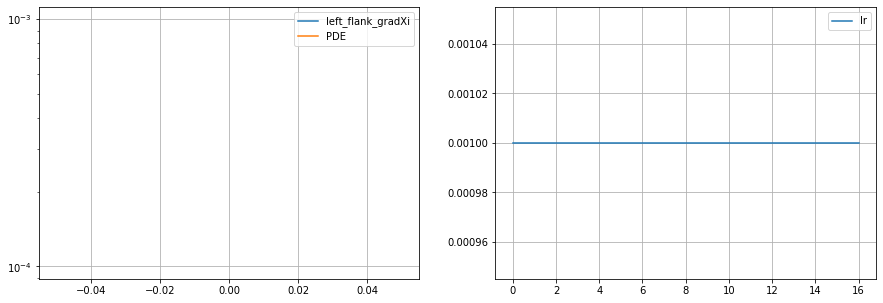

tensor([1.4493e+00, 2.7283e-01, 1.3775e+00, 1.3775e+00, 1.3775e+00, 1.1921e-07,
        1.1764e+00, 2.7283e-01, 1.4493e+00, 2.7283e-01, 1.1921e-07, 1.3775e+00,
        5.6339e-01, 5.6339e-01, 8.8588e-01, 7.1762e-02, 5.6339e-01, 8.8588e-01,
        1.1921e-07, 7.1762e-02, 1.3775e+00, 5.6339e-01, 1.1764e+00, 1.4493e+00,
        5.6339e-01, 1.4493e+00, 1.4493e+00, 2.7283e-01, 1.3775e+00, 8.8588e-01,
        1.1921e-07, 1.1921e-07, 1.1921e-07, 1.1764e+00, 1.1764e+00, 1.1921e-07,
        2.7283e-01, 5.6339e-01, 8.8588e-01, 1.1764e+00, 1.3775e+00, 1.4493e+00,
        5.6339e-01, 2.7283e-01, 7.1762e-02, 7.1762e-02, 2.7283e-01, 1.1764e+00,
        7.1762e-02, 1.1921e-07, 5.6339e-01, 8.8588e-01, 8.8588e-01, 7.1762e-02,
        1.1764e+00, 1.1764e+00, 1.4493e+00, 1.3775e+00, 7.1762e-02, 8.8588e-01,
        2.7283e-01, 1.4493e+00, 8.8588e-01, 7.1762e-02],
       grad_fn=<AddBackward0>)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  fig.canvas.print_figure(bytes_io, **kw)


tensor([1.3775e+00, 1.4493e+00, 2.7283e-01, 1.3775e+00, 1.1764e+00, 5.6339e-01,
        1.3775e+00, 5.6339e-01, 7.1762e-02, 7.1762e-02, 1.1921e-07, 5.6339e-01,
        1.3775e+00, 1.1764e+00, 1.3775e+00, 1.1921e-07, 1.3775e+00, 8.8588e-01,
        7.1762e-02, 8.8588e-01, 1.4493e+00, 7.1762e-02, 2.7283e-01, 1.4493e+00,
        1.1764e+00, 8.8588e-01, 8.8588e-01, 5.6339e-01, 5.6339e-01, 8.8588e-01,
        2.7283e-01, 1.4493e+00, 8.8588e-01, 2.7283e-01, 1.1921e-07, 1.3775e+00,
        8.8588e-01, 1.1764e+00, 7.1762e-02, 1.4493e+00, 1.1764e+00, 1.1764e+00,
        2.7283e-01, 8.8588e-01, 1.1921e-07, 1.1764e+00, 7.1762e-02, 1.1921e-07,
        2.7283e-01, 1.1921e-07, 1.3775e+00, 1.1921e-07, 1.4493e+00, 2.7283e-01,
        1.4493e+00, 1.4493e+00, 5.6339e-01, 7.1762e-02, 1.1764e+00, 5.6339e-01,
        5.6339e-01, 7.1762e-02, 1.1921e-07, 2.7283e-01],
       grad_fn=<AddBackward0>)
tensor([1.3775e+00, 1.4493e+00, 2.7283e-01, 5.6339e-01, 8.8588e-01, 1.1764e+00,
        2.7283e-01, 5.6339e-01, 

KeyboardInterrupt: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  func(*args, **kwargs)


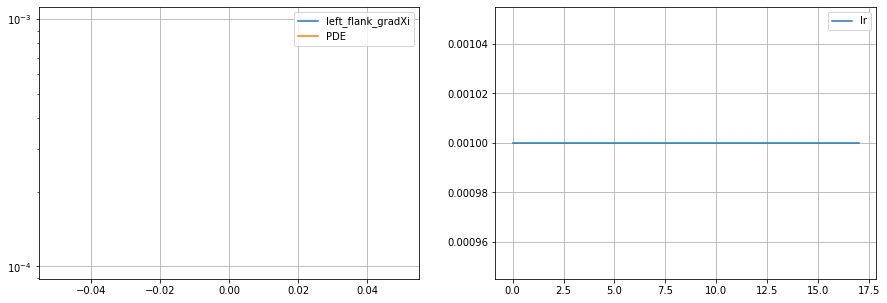

In [12]:
%time hist = pde.solve(epochs, btach_size)

In [13]:
plt.figure(figsize=(10,8))
for key, value in hist.items():
    if key!= 'lr':
        plt.plot(hist[key],label=key)
        plt.legend()
    else:
        pass
    
    plt.yscale('log')

NameError: name 'hist' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)

eval_mesh = Mesh({'x':x, 'y':y})
#pred = pde.eval(eval_mesh).view(len(y),len(x)).numpy()
pred = trial(eval_mesh.gen_data[:]).view(len(y),len(x)).detach().numpy()

In [ ]:
plt.figure(figsize=(10,8))
xx, yy = np.meshgrid(x,y)
plt.contourf(xx,yy, pred, 100, cmap='jet')
plt.colorbar()
plt.axis('equal');

In [ ]:
plt.figure(figsize=(10,8))
grid = TFI(torch.from_numpy(xx), torch.from_numpy(yy), anulus)
plt.contourf(grid.X().detach().numpy().reshape(nx,ny),grid.Y().detach().numpy().reshape(nx,ny), pred, 100, cmap='jet')
plt.colorbar()
plt.axis('equal');

In [ ]:
def double_Integral(xmin, xmax, ymin, ymax, nx, ny, A):

    dS = ((xmax-xmin)/(nx-1)) * ((ymax-ymin)/(ny-1))

    A_Internal = A[1:-1, 1:-1]

    # sides: up, down, left, right
    (A_u, A_d, A_l, A_r) = (A[0, 1:-1], A[-1, 1:-1], A[1:-1, 0], A[1:-1, -1])

    # corners
    (A_ul, A_ur, A_dl, A_dr) = (A[0, 0], A[0, -1], A[-1, 0], A[-1, -1])

    return dS * (np.sum(A_Internal)\
                + 0.5 * (np.sum(A_u) + np.sum(A_d) + np.sum(A_l) + np.sum(A_r))\
                + 0.25 * (A_ul + A_ur + A_dl + A_dr))

x_min,x_max,n_points_x = (0,1,nx)
y_min,y_max,n_points_y = (0,1,ny)
x = np.linspace(x_min,x_max,n_points_x)
y = np.linspace(y_min,y_max,n_points_y)

# def F(x,y):
#     return x**4 * y

# zz = F(x.reshape(-1,1),y.reshape(1,-1))

print(2*double_Integral(x_min, x_max, y_min, y_max, n_points_x, n_points_y, pred))

In [ ]:
from scipy.integrate import simps
#int_pred = pred.ravel()
# x = x.ravel()
# y = y.ravel()
2*simps([simps(zz_x,x) for zz_x in pred],y) 

In [ ]:
non_dim.non_dim_volume(xcd7['flow_rate_gpm'])

In [ ]:
pred.mean()

In [ ]:
x.ravel()